# Random numbers example

`Exchange economy with many consumers` and `Monte Carlo` is the topics

In [10]:
import numpy as np

from scipy.stats import norm # normal dist

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black", "grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({"font.size":14})

import ipywidgets as widgets # for interactive plots/buttons

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with uniformly *heterogenous* coefficients

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
 & \,\,\,\alpha_{j}\sim\mathcal{U}(\underline{\mu},\overline{\mu})\\
 & \,\,\,0<\underline{\mu}<\overline{\mu}<1
\end{aligned}
$$

4. Endowments are *homogenous* and given by

$$
\boldsymbol{e}^{j}=(e_{1}^{j},e_{2}^{j})=(k,1),\,k>0
$$
where good 2 is *numeraire*.

Giving income $I$, with the following budget constriant:
\begin{equation}
I \equiv kp_1+ p_2 \geq x_1p_1 + x_2
\end{equation}

The implied **demand functions** are:

$$
\begin{aligned}
x_{1}^{\star j}(p_{1},p_{2},e^{j})&=&\alpha_{j}\frac{I}{p_{1}}=\alpha_{j}\frac{kp_{1}+p_{2}}{p_{1}} \\
x_{2}^{\star j}(p_{1},p_{2},e^{j})&=&(1-\alpha_{j})\frac{I}{p_{2}}=(1-\alpha_{j})\frac{kp_{1}+p_{2}}{p_{2}}
\end{aligned}
$$

The **equilibrium** for a random draw of $\alpha = \{\alpha_1,\alpha_2,\dots,\alpha_N\}$ is a set of **prices** $p_1$ and $p_2$ satifying:

$$
\begin{aligned}
x_1(p_1,p_2) = \underset{\text{Demand}}{\underbrace{\sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j})}} &=  \underset{\text{Supply}}{\underbrace{\sum_{j=1}^N e_1^j}} = Nk \\
x_2(p_1,p_2) = \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &= \sum_{j=1}^N e_2^j = N
\end{aligned}
$$

Solving for equilibrium requires randomness

#### Demand

In [2]:
# a. parameters
N = 1000 # number of agents
k = 2 # relative endowment of good 1 - twice as many good 1 than good 2 in the economy
mu_low = 0.1 # lower bound on alpha
mu_high = 0.9 # higher bound on alpha 

# b. demand function
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

def demand_good_2_func(alpha,p1,p2,k):
    I = k*p1+p2
    return (1-alpha)*I/p2

Find demand distribution and total demand:

In [3]:
def find_demand_good_1(alphas,p1,p2,k):
    distr = demand_good_1_func(alphas,p1,p2,k)
    total = np.sum(distr)
    return distr,total

Calculate for various prices:

In [4]:
# a. draw alphas
alphas = np.random.uniform(low=mu_low,high=mu_high,size=N)

# b. a set of hypothetical prices 
p1_vec = [0.5,1,2,5]
p2 = 1

# c. calculate demand given prices
dists = np.empty((len(p1_vec),N))
totals = np.empty(len(p1_vec))
for i,p1 in enumerate(p1_vec):
    dist,total = find_demand_good_1(alphas,p1,p2,k)
    dists[i,:] = dist
    totals[i] = total

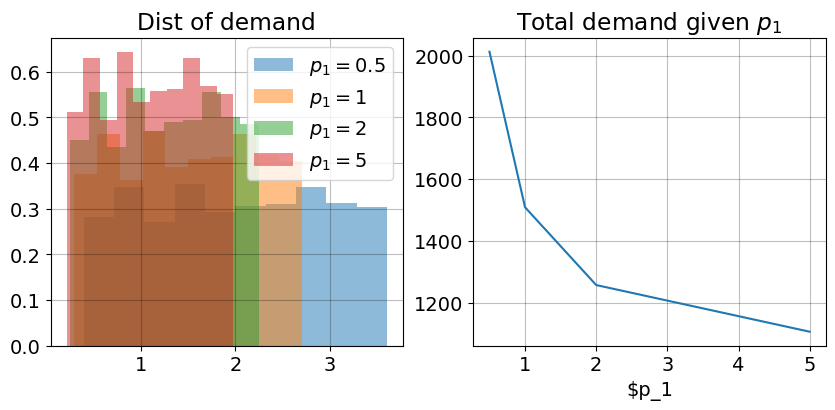

In [5]:
fig = plt.figure(figsize=(10,4))

ax_left = fig.add_subplot(1,2,1)
ax_left.set_title('Dist of demand')
for i,p1 in enumerate(p1_vec):
    ax_left.hist(dists[i],density=True,alpha=0.5,label=f'$p_1 = {p1}$')
ax_left.legend(loc='upper right')

ax_right = fig.add_subplot(1,2,2)
ax_right.set_title('Total demand given $p_1$')
ax_right.grid(True)
ax_right.plot(p1_vec,totals)
ax_right.set_xlabel('$p_1');

#### Interactive figures 

In [7]:
def interactive_figure(alphas,p1,p2,k):

    # a. calculations
    dist,_total = find_demand_good_1(alphas,p1,p2,k)

    # b. figure 
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.hist(dist,density=True)
    ax.set_xlim([0,4])
    ax.set_ylim([0,0.8])
    ax.set_title('Dist of demand for good 1')

With a slider:

In [11]:
widgets.interact(interactive_figure,
                 alphas=widgets.fixed(alphas),
                 p1=widgets.FloatSlider(description=r'p1',min=0.1, max=5, step=0.01, value=2),
                 p2=widgets.fixed(p2),
                 k=widgets.fixed(k)
);

interactive(children=(FloatSlider(value=2.0, description='p1', max=5.0, min=0.1, step=0.01), Output()), _dom_c…

With a textbox

In [12]:
widgets.interact(interactive_figure,
                 alphas=widgets.fixed(alphas),
                 p1=widgets.FloatText(description=r'p1',min=0.1, max=5, step=0.01, value=2),
                 p2=widgets.fixed(p2),
                 k=widgets.fixed(k)
);

interactive(children=(FloatText(value=2.0, description='p1', step=0.01), Output()), _dom_classes=('widget-inte…

Or dropdown menu

In [13]:
widgets.interact(interactive_figure,
                 alphas=widgets.fixed(alphas),
                 p1=widgets.Dropdown(description=r'p1',options=[0.5,1,1.5,2,2.5,3,3.5], value=2),
                 p2=widgets.fixed(p2),
                 k=widgets.fixed(k)
);

interactive(children=(Dropdown(description='p1', index=3, options=(0.5, 1, 1.5, 2, 2.5, 3, 3.5), value=2), Out…